In [1]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def blur(img, mode = 'box', kernel_size = 3):
    # mode = 'box' or 'gaussian' or 'motion'
    dummy = np.copy(img)
    if mode == 'box':
        h = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    elif mode == 'gaussian':
        h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

In [3]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

In [4]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

In [5]:
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [6]:
file_name = os.path.join(r"C:\Users\pradh\Desktop\lena512.jpg") 
img = rgb2gray(plt.imread(file_name))

blurred_img = blur(img, mode = 'motion', kernel_size = 3)

noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

kernel = gaussian_kernel(3)

filtered_img = wiener_filter(noisy_img, kernel, K = 30)

C:\Users\pradh\AppData\Local\Temp\ipykernel_19280\670992704.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)


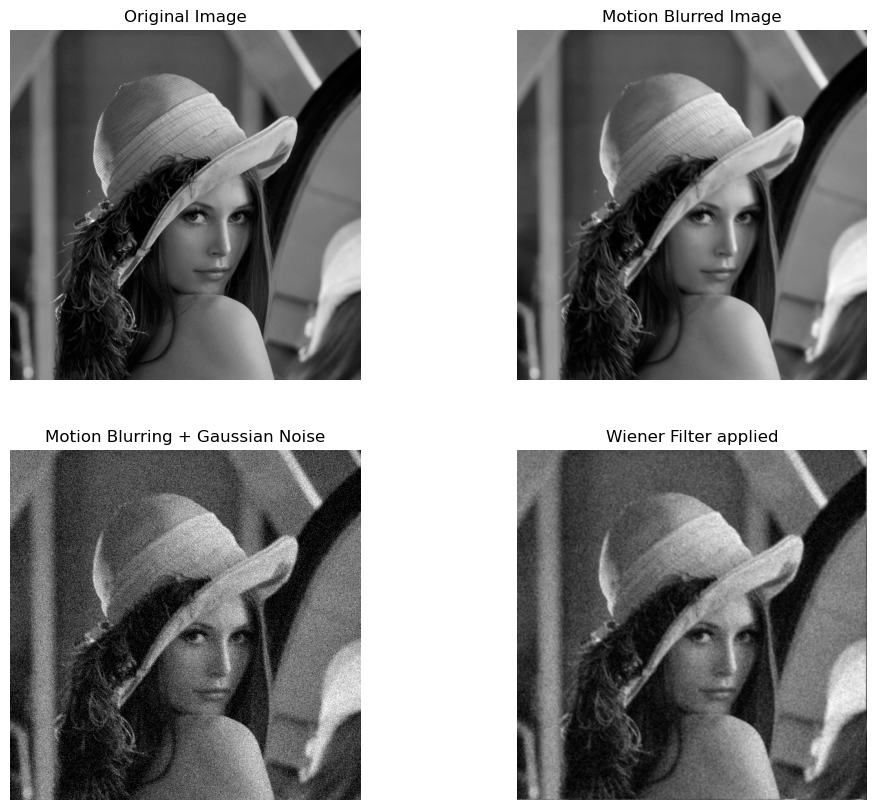

In [20]:
display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
    plt.axis('off')
plt.show()

### Mean Squared Error

array([[112.03646153, 110.14532394, 110.21046718, ...,  61.43911144,
         44.38418294,  34.02990877],
       [112.17150956, 110.09039747, 111.30716942, ...,  77.0305574 ,
         55.11050396,  40.16641472],
       [112.16785653, 109.89996411, 111.23615269, ...,  94.89784427,
         70.00556556,  49.38429695],
       ...,
       [ 27.3821241 ,  21.43701536,  21.44878045, ...,  66.74431894,
         68.83163333,  67.73961712],
       [ 26.29345747,  24.56175093,  19.36465439, ...,  70.85996331,
         71.89524674,  70.66981497],
       [ 26.76551612,  24.85585161,  18.48668449, ...,  71.3755672 ,
         72.02426113,  72.72412383]])

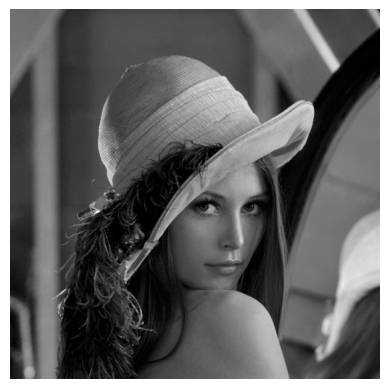

In [21]:
# Crop the original image to match the size of filtered_img
img_cropped = img[:510, :510]

# Compute the difference
diff = abs(filtered_img - img_cropped)
plt.imshow(diff, cmap='gray')
plt.axis('off')
diff

(-0.5, 509.5, 509.5, -0.5)

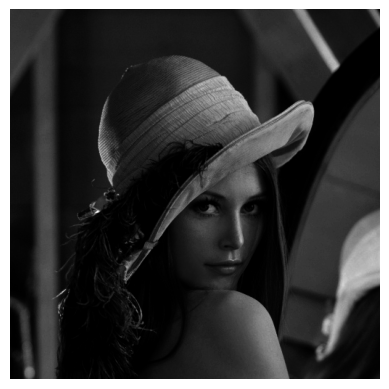

In [22]:
#Mean square Error
mse = (diff*diff)/(510*510)
plt.imshow(mse, cmap='gray')
plt.axis('off')